In [2]:
import matplotlib.pyplot as plt
import numpy 
import pandas
import seaborn
seaborn.set(color_codes=True)


In [3]:
# dataset = pandas.read_csv(
#     'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv'
# )
# dataset.shape

import io
import requests
url='https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv'
s=requests.get(url).content
dataset=pandas.read_csv(io.StringIO(s.decode('utf-8')))

dataset.shape

(1620, 120)

In [4]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [5]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


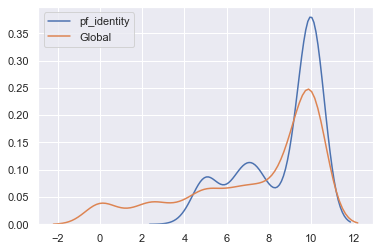

In [6]:
seaborn.kdeplot(
    dataset['Latin America & the Caribbean' == dataset['region']]['pf_identity']
)
seaborn.kdeplot(dataset['pf_identity'], label="Global")


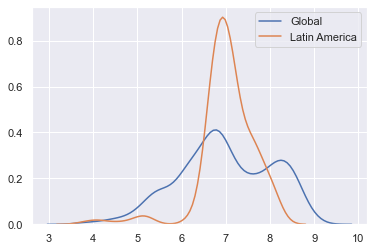

In [7]:
seaborn.kdeplot(dataset['hf_score'], label="Global");
seaborn.kdeplot(dataset['Latin America & the Caribbean' == dataset['region']]['hf_score'], label="Latin America")

Los graficos previos nos brindan una visión quizás demasiado general de los datos. Juntando todos los años y paises las distribuciónes no van a poder brindar información verdaderamente descriptiva de cada pais.
En el caso de la variable pf_identity global visualmente asemeja a una distribucion beta con sesgo alrededor de 8, mientras que la variable hf_score global asemeja visualmente a una distribucion bimodal.

Podemos ver en el siguiente gráfico como el `hf_score` de Perú, Argentina y Venezuela lo diferentes que son. Los datos de Latinoamérica no son lo suficientemente homogéneos como para tomarlos como un conjunto.

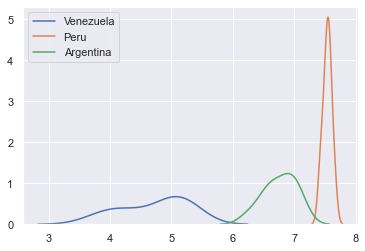

In [8]:
seaborn.kdeplot(
    dataset['Venezuela' == dataset['countries']]['hf_score'],
    label="Venezuela"
)
seaborn.kdeplot(
    dataset['Peru' == dataset['countries']]['hf_score'],
    label="Peru"
)
seaborn.kdeplot(
    dataset['Argentina' == dataset['countries']]['hf_score'],
    label="Argentina"
)

También podemos ver los cambios que hay año a año en algunos paises. Sumar al conjunto de datos todos los años y paises sería poner en el mismo foco a regiones con trayectorias distintas.

Por ejemplo, podemos ver como el valor de `hf_score` de Noruega se mantiene al rededor de ~8.5 pero por otra parte en Syria en 2011 tenia un valor de ~5.5 y luego en 2013 baja hasta ~3.8

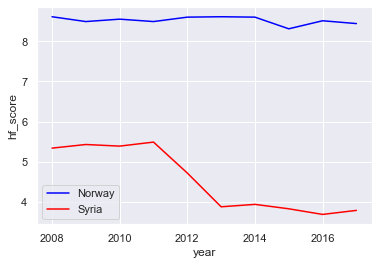

In [9]:
syria_dt = dataset['Syria' == dataset['countries']]
norway_dt = dataset['Norway' == dataset['countries']]

seaborn.lineplot(x="year", y="hf_score", data=norway_dt, color="blue", label = 'Norway' )
seaborn.lineplot(x="year", y="hf_score", data=syria_dt, color="red", label = 'Syria')

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

# 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

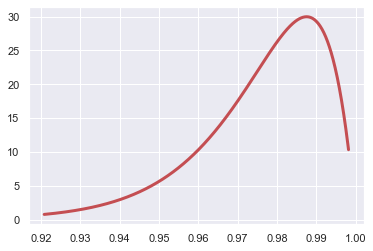

In [16]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 80, 2
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = numpy.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=3, alpha=1, label='beta pdf')

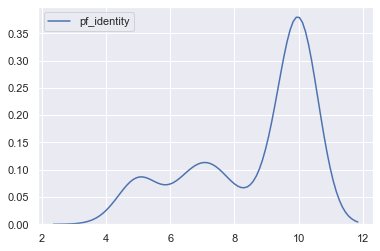

In [11]:
real = dataset['Latin America & the Caribbean' == dataset['region']].pf_identity.dropna()
seaborn.kdeplot(real)

In [12]:
from scipy import stats
stats.ks_2samp(real,x)

Ks_2sampResult(statistic=1.0, pvalue=3.3306690738754696e-16)

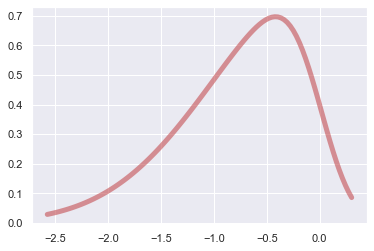

In [13]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = -4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x1 = numpy.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x1, skewnorm.pdf(x1, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In [23]:
stats.ks_2samp(real,x1)

Ks_2sampResult(statistic=0.935064935064935, pvalue=7.771561172376096e-16)